In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#initialize
xgr = np.linspace(0, 49, 100)
zgr = -np.sqrt(xgr)

resolution = 30
max_depth = 3

temp_depth_grid = np.linspace(0, max_depth, resolution)
initial_temp = np.linspace(-5, 5, resolution)

thermal_matrix = np.zeros((xgr.shape[0], temp_depth_grid.shape[0]))

for i in range(len(thermal_matrix)):
    thermal_matrix[i,:] = initial_temp
    
gradient = np.gradient(zgr, xgr)

orientation = np.arctan(gradient) - 0.5 * np.pi
    
abs_x1 = np.tile(xgr, (len(temp_depth_grid), 1)).T + np.outer(np.cos(orientation), temp_depth_grid)
abs_z2 = np.tile(zgr, (len(temp_depth_grid), 1)).T + np.outer(np.sin(orientation), temp_depth_grid)

In [4]:
# apply boundary conditions
# ghost_nodes_temp = thermal_matrix[:,0]

# frozen_mask = (thermal_matrix[:,0]  self.config.thermal.T_melt)
# unfrozen_mask = np.ones(frozen_mask.shape) - frozen_mask

# print(ghost_nodes_temp.shape)
# print(ghost_nodes_temp)

# ghost_nodes_enth = frozen_mask * ghost_nodes_temp * self.config.thermal.c_frozen_soil + unfrozen_mask * ghost_nodes_temp * self.config.thermal.c_unfrozen_soil +

In [5]:
x = np.ones((3, 3))
y = np.zeros(3)

In [6]:
np.column_stack((y, x))

array([[0., 1., 1., 1.],
       [0., 1., 1., 1.],
       [0., 1., 1., 1.]])

In [7]:
import numpy as np
from scipy.spatial import ConvexHull

# Example 2D points
points = np.array([[0, 0],
                   [1, 2],
                   [2, 1],
                   [3, 4],
                   [4, 3],
                   [5, 1],
                   [6, 0]])

# Compute convex hull
hull = ConvexHull(points)

# # Extract top boundary vertices
# top_boundary_vertices = []
# for edge in hull.vertices:
#     if np.all(points[edge, 1] == np.max(points[hull.vertices, 1])):
#         top_boundary_vertices.append(edge)

# # Sort the top boundary vertices based on x-coordinate
# top_boundary_vertices = sorted(top_boundary_vertices, key=lambda x: points[x, 0])

# # Generate coordinates along the top boundary
# num_points = 10
# top_boundary_coordinates = []
# for i in range(len(top_boundary_vertices) - 1):
#     x0, y0 = points[top_boundary_vertices[i]]
#     x1, y1 = points[top_boundary_vertices[i + 1]]
#     xs = np.linspace(x0, x1, num_points, endpoint=False)
#     ys = np.linspace(y0, y1, num_points, endpoint=False)
#     top_boundary_coordinates.extend(zip(xs, ys))

# # Add the last vertex
# x_last, y_last = points[top_boundary_vertices[-1]]
# top_boundary_coordinates.append((x_last, y_last))

# # Convert to numpy array
# top_boundary_coordinates = np.array(top_boundary_coordinates)

# print(top_boundary_coordinates)

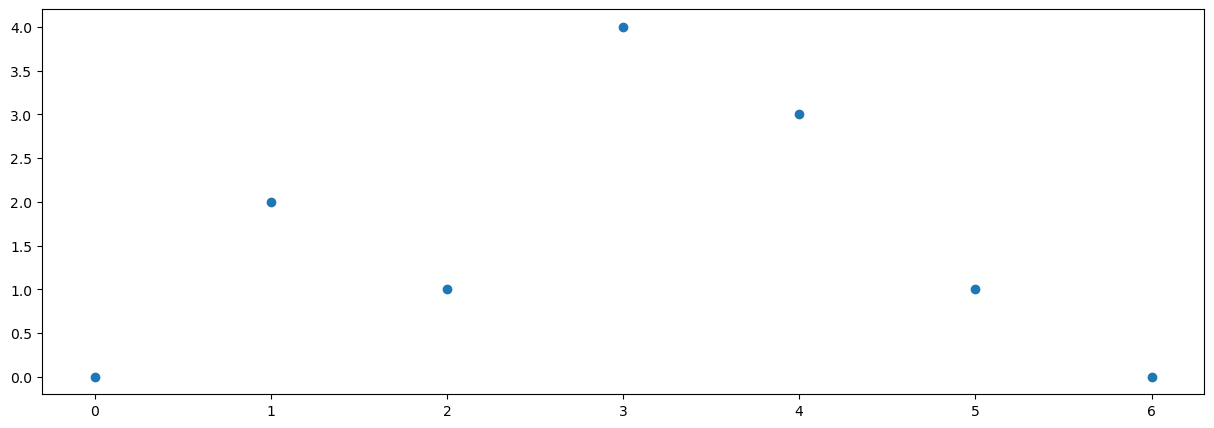

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.scatter(points[:,0], points[:,1])

In [15]:
# top_boundary_vertices = np.unique(hull.simplices[np.isin(hull.simplices, hull.vertices[hull.vertices[:, 1] == np.max(points[hull.vertices, 1])])])
import math

In [18]:
u = -5
v = -5
angle = math.atan2(u, v)

print(angle / (2*np.pi) * 360)

-135.0
